# PIA - Optimización de equipos de la NBA con el Método Win Shares

#### Parte 1 - Limpieza y obtencion de Datos

**Resumen:** Se hizo un webscrapping de la Página de ESPN para sacar los salarios de los jugadores de la NBA para la temporada 24-25. Adicional a esto se hizo un merge con una base de datos proporcionada por StatHead sobre las estadisticas de estos mismos.

Los datos se modificaron para quitar caracteres raros y mejorar los resultados encontrados en el merge, además modifique las variables y genere nuevas para terminar con un dataset para el proyecto Final

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Salary_list = []
for i in range(1,14):
    
    url = f"https://www.espn.com/nba/salaries/_/year/2025/page/{i}"
    headers = {"User-Agent": "Mozilla/5.0"}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")

    # Encuentra la tabla
    table = soup.find("table")
    rows = table.find_all("tr")[1:]  # omite encabezado

    for row in rows:
        cols = [col.text.strip() for col in row.find_all("td")]
        Salary_list.append(cols)

Salary = pd.DataFrame(Salary_list, columns=["Rank","Player", "Team", "Salary"])
Salary.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Salarys.csv')
Salary.head()

,Rank,Player,Team,Salary
0,1,"Stephen Curry, G",Golden State Warriors,"$55,761,216"
1,2,"Joel Embiid, C",Philadelphia 76ers,"$51,415,938"
2,3,"Nikola Jokic, C",Denver Nuggets,"$51,415,938"
3,4,"Kevin Durant, F",Phoenix Suns,"$51,179,021"
4,5,"Bradley Beal, G",Phoenix Suns,"$50,203,930"


In [80]:
import re
def Clean_Name_Salary(nombre):
    nombre = re.sub(r'\b(Sr\.)\b', '', nombre)
    return nombre.strip()

def Clean_Name_Og(nombre):
    nombre = re.sub(r'(?<!Jr)\.', '', nombre)
    return nombre.strip()

In [ ]:
Salary[["Player", "Pos"]] = Salary["Player"].str.split(",", expand=True)
Salary["Player"] = Salary["Player"].str.strip()
Salary["Pos"] = Salary["Pos"].str.strip()
Salary["Player"] = Salary["Player"].apply(Clean_Name_Salary)
Salary.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Salarys.csv')
Salary.head()

,Unnamed: 0.1,Rank,Player,Team,Salary,Pos
0,0,1,Stephen Curry,Golden State Warriors,"$55,761,216",G
1,1,2,Joel Embiid,Philadelphia 76ers,"$51,415,938",C
2,2,3,Nikola Jokic,Denver Nuggets,"$51,415,938",C
3,3,4,Kevin Durant,Phoenix Suns,"$51,179,021",F
4,4,5,Bradley Beal,Phoenix Suns,"$50,203,930",G


In [82]:
from unidecode import unidecode
NBA_DB = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/NBA Original Dataset.csv')
NBA_DB["Player"] = NBA_DB["Player"].apply(unidecode)
NBA_DB["Player"] = NBA_DB["Player"].apply(Clean_Name_Og)
NBA_DB.head()

,Rk,Player,WS,USG%,BPM,VORP,PER,Season,Age,Team,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos
0,1,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,2024-25,26,OKC,...,3.4,3.0,45.9,0.519,0.571,0.375,0.898,0.637,0.569,G
1,2,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,2024-25,29,DEN,...,4.3,3.0,38.7,0.576,0.627,0.417,0.800,0.663,0.627,C-F
2,3,Ivica Zubac,11.7,19.5,3.1,3.4,22.3,2024-25,27,LAC,...,2.3,3.1,24.5,0.628,0.628,NaN,0.661,0.641,0.628,C
3,4,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,2024-25,26,CLE,...,2.0,2.7,23.1,0.706,0.712,0.000,0.718,0.724,0.706,C-F
4,5,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,2024-25,30,MIL,...,4.3,3.3,42.7,0.601,0.620,0.222,0.617,0.625,0.607,F-G


In [83]:
Final_DB = pd.merge(NBA_DB,Salary[['Player','Salary']],on='Player',how='left')
Final_DB = Final_DB.dropna()
Final_DB.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB.csv')
Final_DB.head()

,Rk,Player,WS,USG%,BPM,VORP,PER,Season,Age,Team,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,Salary
0,1,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,2024-25,26,OKC,...,3.0,45.9,0.519,0.571,0.375,0.898,0.637,0.569,G,"$35,859,950"
1,2,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,2024-25,29,DEN,...,3.0,38.7,0.576,0.627,0.417,0.800,0.663,0.627,C-F,"$51,415,938"
3,4,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,2024-25,26,CLE,...,2.7,23.1,0.706,0.712,0.000,0.718,0.724,0.706,C-F,"$20,000,000"
4,5,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,2024-25,30,MIL,...,3.3,42.7,0.601,0.620,0.222,0.617,0.625,0.607,F-G,"$48,787,676"
5,6,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,2024-25,24,IND,...,1.8,26.6,0.473,0.581,0.388,0.851,0.616,0.582,G,"$42,176,000"


In [36]:
M_Final_DB = Final_DB[["Player","WS","USG%","BPM","VORP","PER","Age","G","2PA","2P%","3PA","3P%","FTA","FT%","ORB","DRB","AST","STL","BLK","TOV","PF","PTS","Pos","Salary"]]
M_Final_DB['Reliability'] = M_Final_DB["G"]/82
M_Final_DB["Salary"] = M_Final_DB["Salary"].replace('[\$,]', '', regex=True).astype(float)
M_Final_DB.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
M_Final_DB.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_40572\275604227.py:3: SyntaxWarning: invalid escape sequence '\$'
  M_Final_DB["Salary"] = M_Final_DB["Salary"].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_40572\275604227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Final_DB['Reliability'] = M_Final_DB["G"]/82
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_40572\275604227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,2P%,...,DRB,AST,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability
0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,0.571,...,5.8,9.0,2.4,1.4,3.4,3.0,45.9,G,35859950.0,0.926829
1,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,29,70,19.3,0.627,...,12.9,13.4,2.4,0.8,4.3,3.0,38.7,C-F,51415938.0,0.853659
2,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,0.712,...,12.2,3.3,1.6,1.5,2.0,2.7,23.1,C-F,20000000.0,1.000000
3,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,30,67,26.3,0.620,...,13.7,9.1,1.2,1.6,4.3,3.3,42.7,F-G,48787676.0,0.817073
4,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,24,73,8.7,0.581,...,4.2,13.2,2.1,1.0,2.4,1.8,26.6,G,42176000.0,0.890244


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
M_Final_DB = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
M_Final_DB

,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,2P%,...,DRB,AST,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability
0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,0.571,...,5.8,9.0,2.4,1.4,3.4,3.0,45.9,G,35859950,0.926829
1,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,29,70,19.3,0.627,...,12.9,13.4,2.4,0.8,4.3,3.0,38.7,C-F,51415938,0.853659
2,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,0.712,...,12.2,3.3,1.6,1.5,2.0,2.7,23.1,C-F,20000000,1.000000
3,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,30,67,26.3,0.620,...,13.7,9.1,1.2,1.6,4.3,3.3,42.7,F-G,48787676,0.817073
4,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,24,73,8.7,0.581,...,4.2,13.2,2.1,1.0,2.4,1.8,26.6,G,42176000,0.890244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,Jordan Hawkins,-0.5,21.0,-5.4,-1.2,9.6,22,56,8.1,0.433,...,4.8,2.4,1.1,0.8,2.1,1.9,21.9,G,4525680,0.682927
432,Isaiah Collier,-0.8,18.9,-5.3,-1.6,9.7,20,71,10.1,0.497,...,5.3,11.6,1.7,0.4,5.4,3.9,16.1,G,2520120,0.865854
433,Kyle Kuzma,-0.9,24.0,-4.9,-1.4,10.6,29,65,13.3,0.512,...,7.8,3.8,0.9,0.5,3.6,3.0,23.9,F,22410605,0.792683
434,Vasilije Micic,-1.0,19.9,-7.0,-1.0,6.5,31,41,9.0,0.338,...,4.2,7.8,0.9,0.0,4.7,2.8,16.4,G,7723000,0.500000


### Parte 2: Analisis Descriptivo de los Datos

La idea de este apartado es ver en teminos generales, medias, varianzas, graficar los histogramas y verificar la normalidad de los datos.

In [3]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

M_Final_DB_Num = M_Final_DB.drop(['Player','G','Pos'], axis=1)

# Prueba de normalidad de Shapiro-Wilk
for var in M_Final_DB_Num:
    stat, p = shapiro(M_Final_DB_Num[var].dropna())
    print(f"{var}: p = {p:.4f} → {'Paramétrica' if p > 0.05 else 'No paramétrica'}")

WS: p = 0.0000 → No paramétrica
USG%: p = 0.0000 → No paramétrica
BPM: p = 0.0000 → No paramétrica
VORP: p = 0.0000 → No paramétrica
PER: p = 0.0000 → No paramétrica
Age: p = 0.0000 → No paramétrica
2PA: p = 0.0000 → No paramétrica
2P%: p = 0.0000 → No paramétrica
3PA: p = 0.0005 → No paramétrica
3P%: p = 0.0000 → No paramétrica
FTA: p = 0.0000 → No paramétrica
FT%: p = 0.0000 → No paramétrica
ORB: p = 0.0000 → No paramétrica
DRB: p = 0.0000 → No paramétrica
AST: p = 0.0000 → No paramétrica
STL: p = 0.0000 → No paramétrica
BLK: p = 0.0000 → No paramétrica
TOV: p = 0.0000 → No paramétrica
PF: p = 0.0000 → No paramétrica
PTS: p = 0.0000 → No paramétrica
Salary: p = 0.0000 → No paramétrica
Reliability: p = 0.0000 → No paramétrica


Podemos ver que nuestros resultados son no parametrico es decir podemos asumir que no son normales. Esto es muy comun en datos deportivos

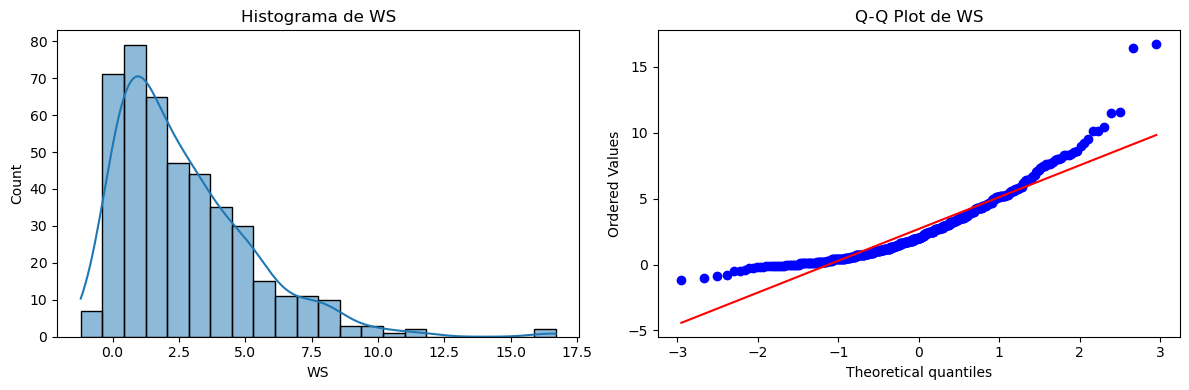

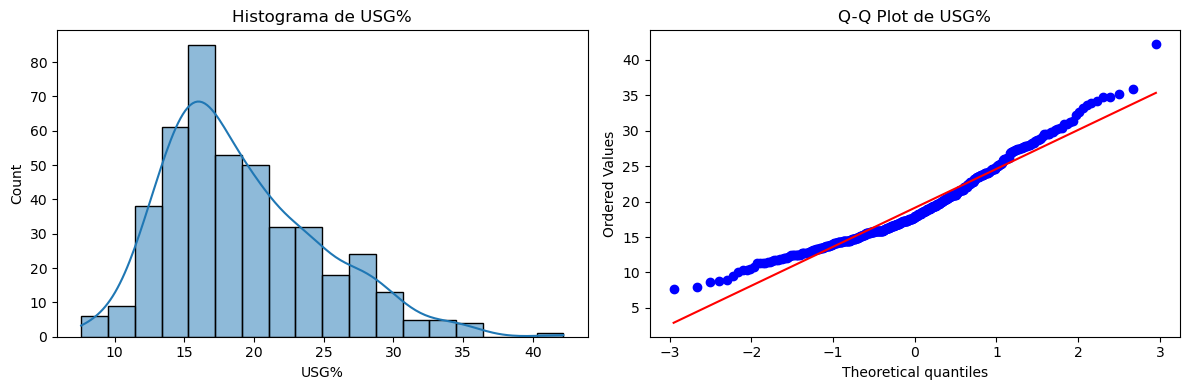

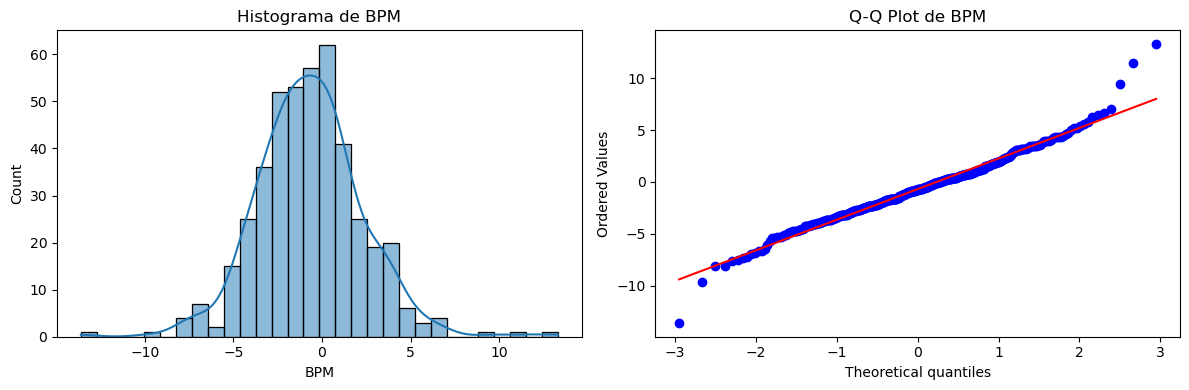

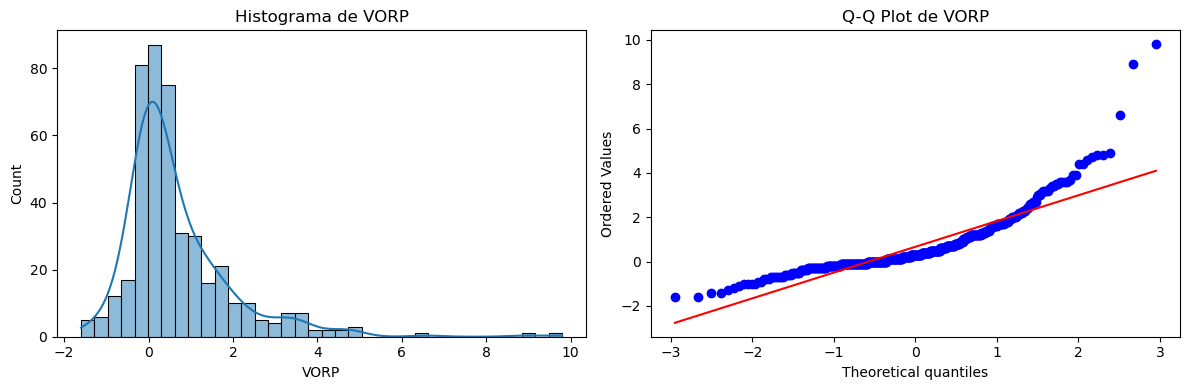

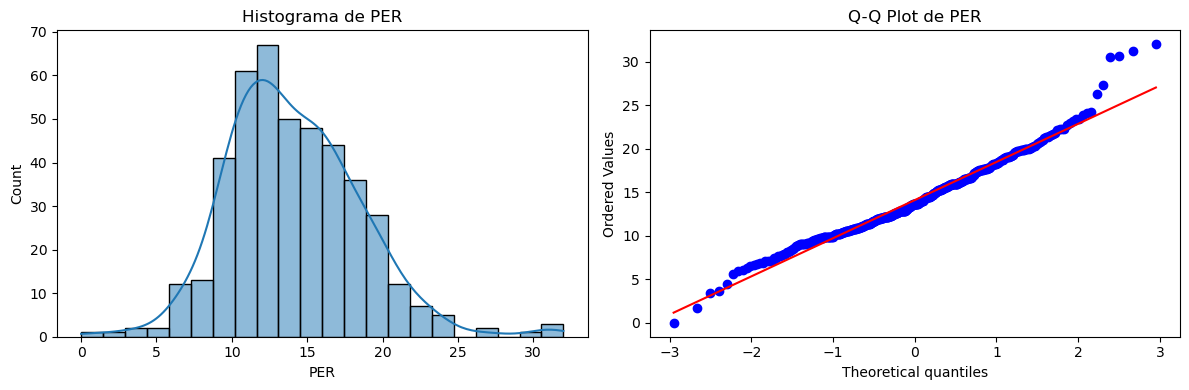

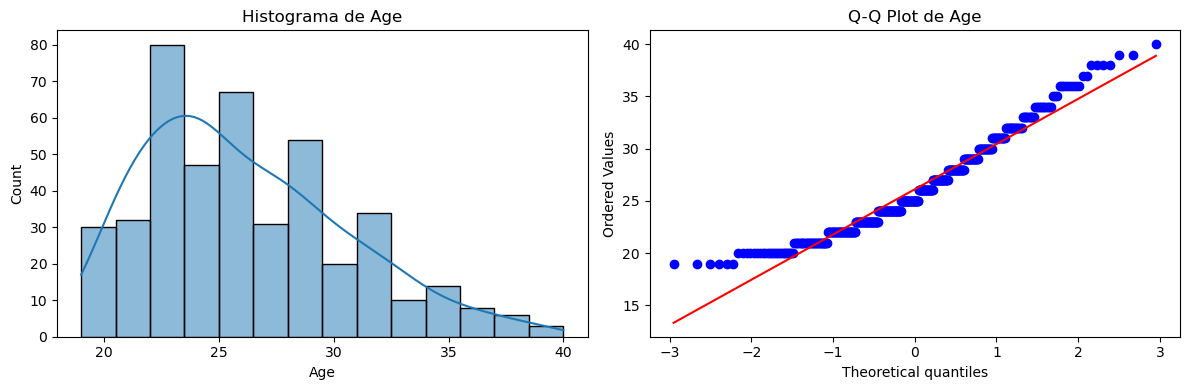

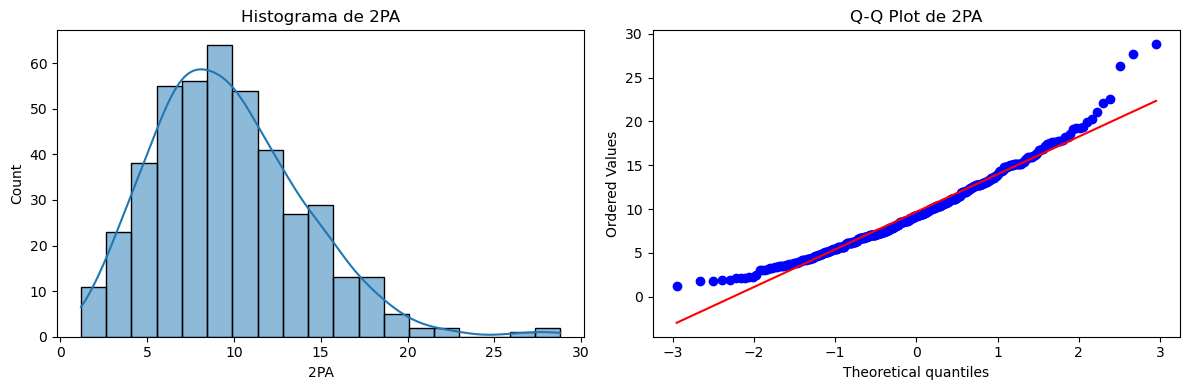

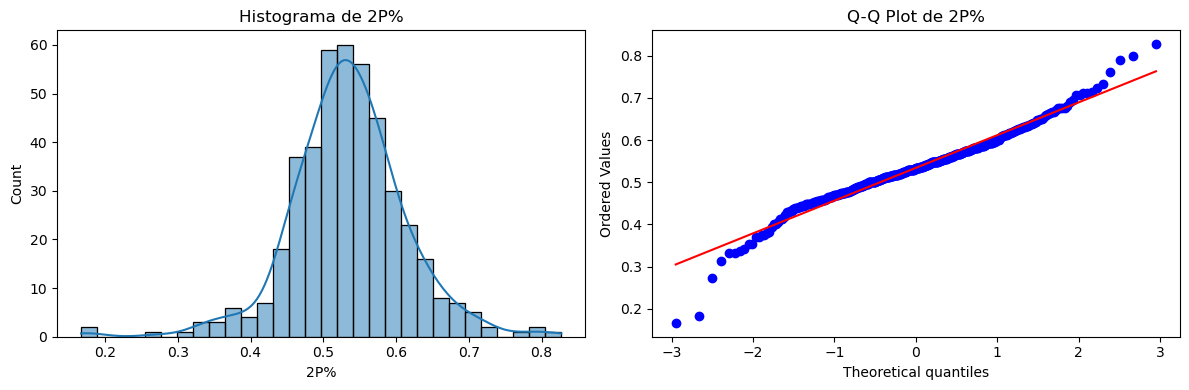

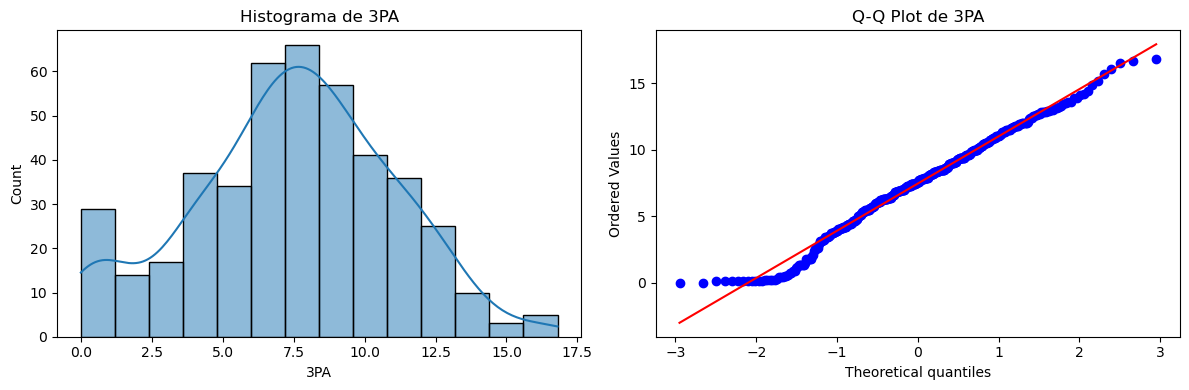

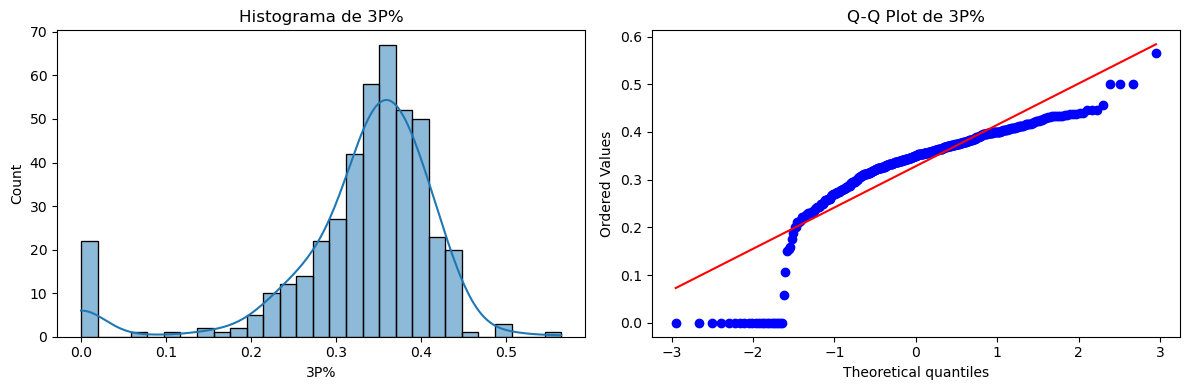

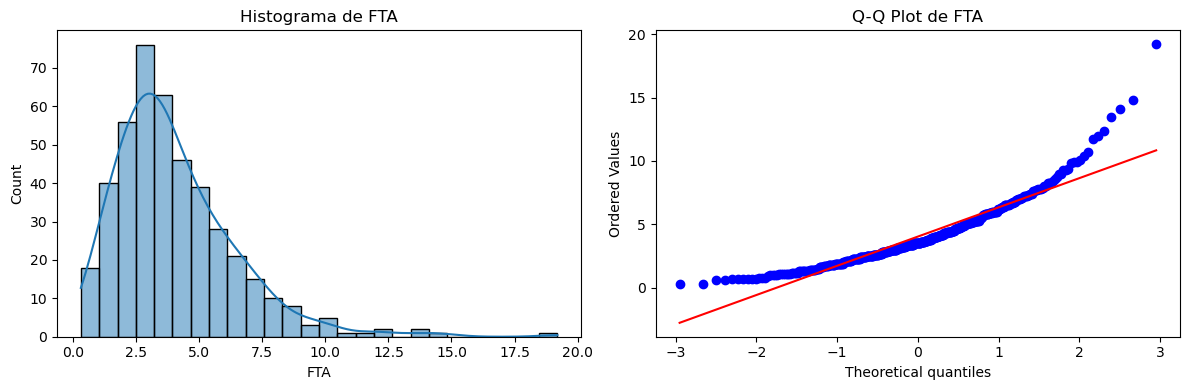

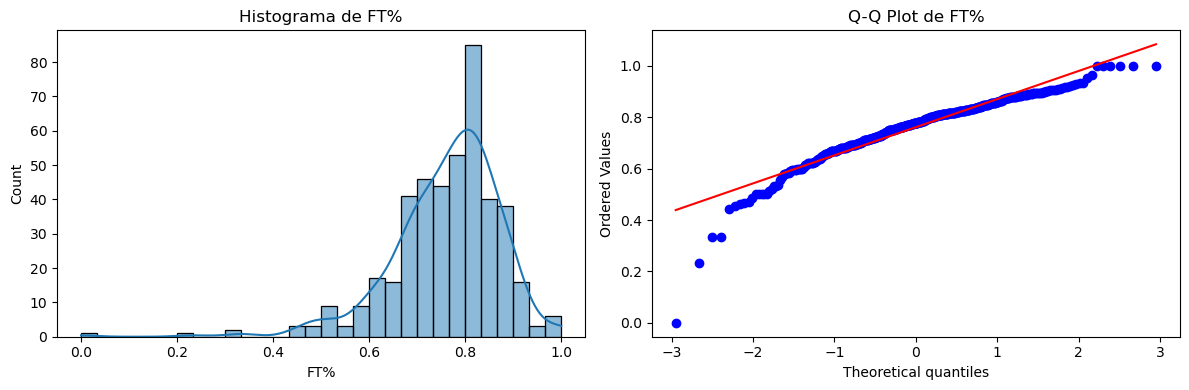

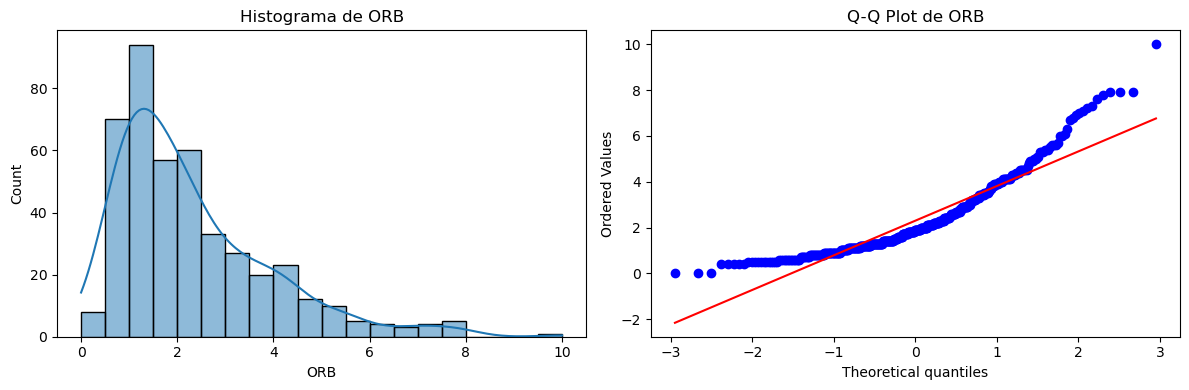

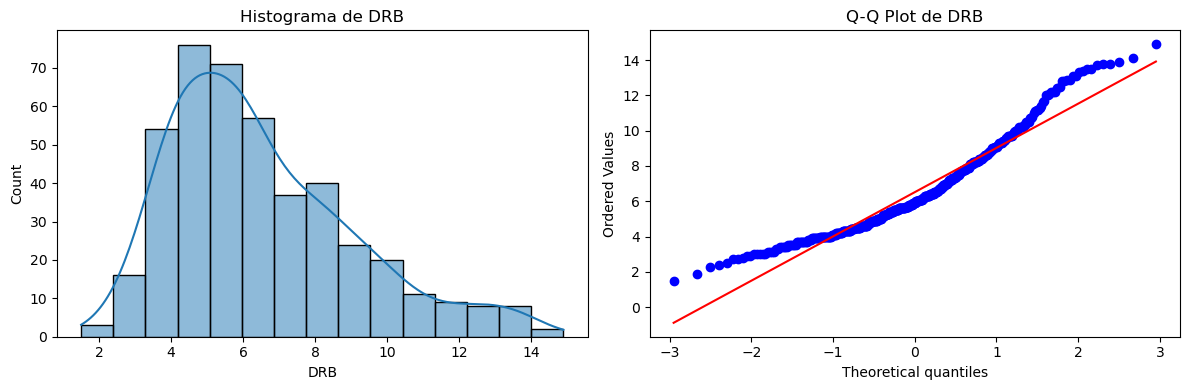

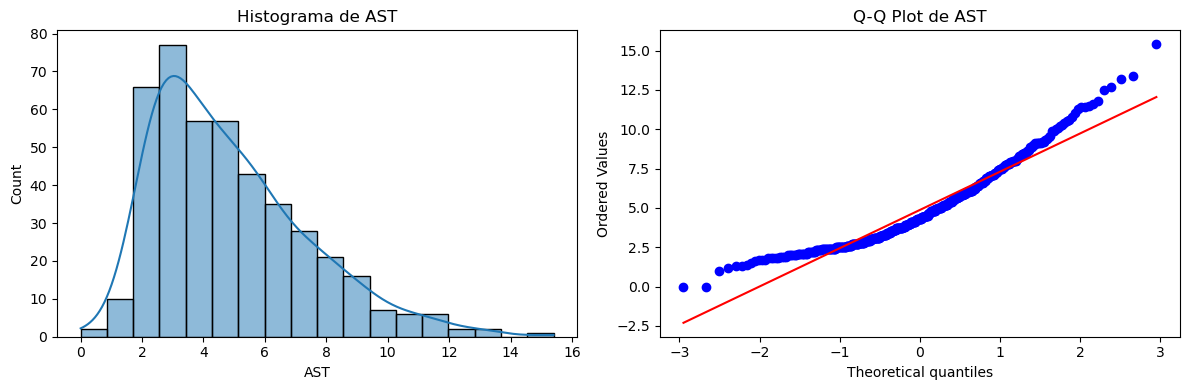

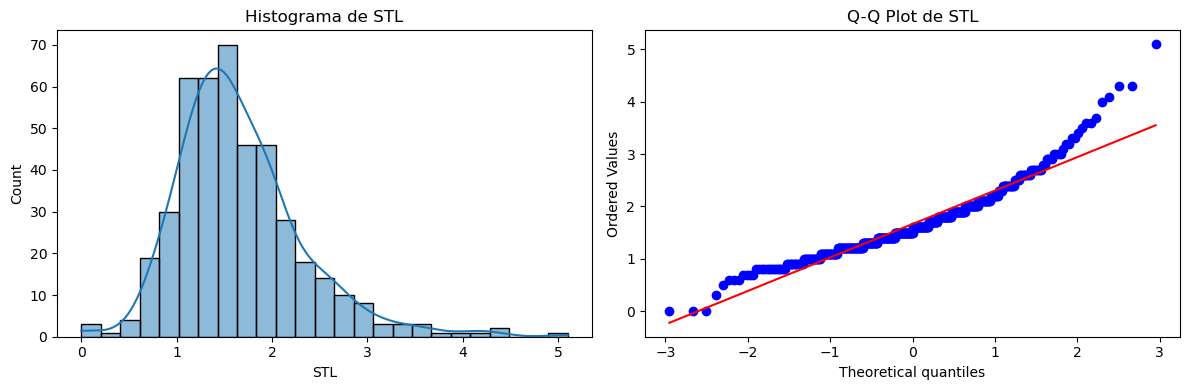

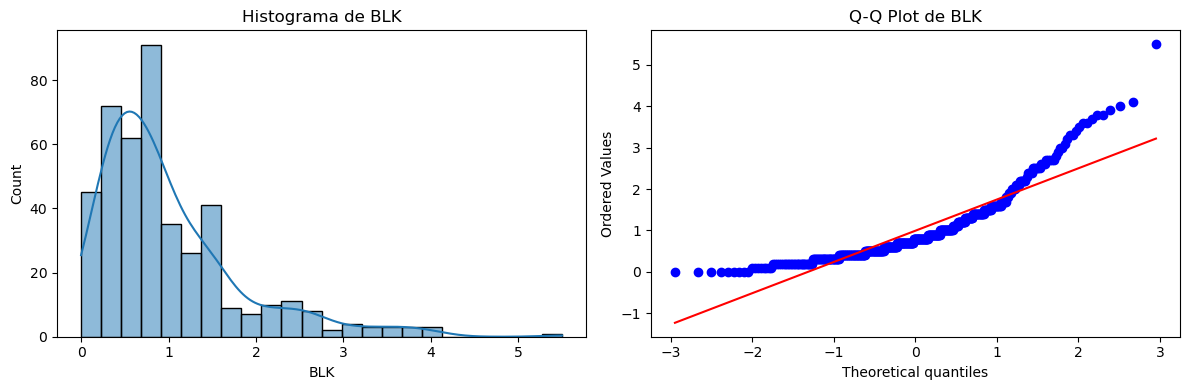

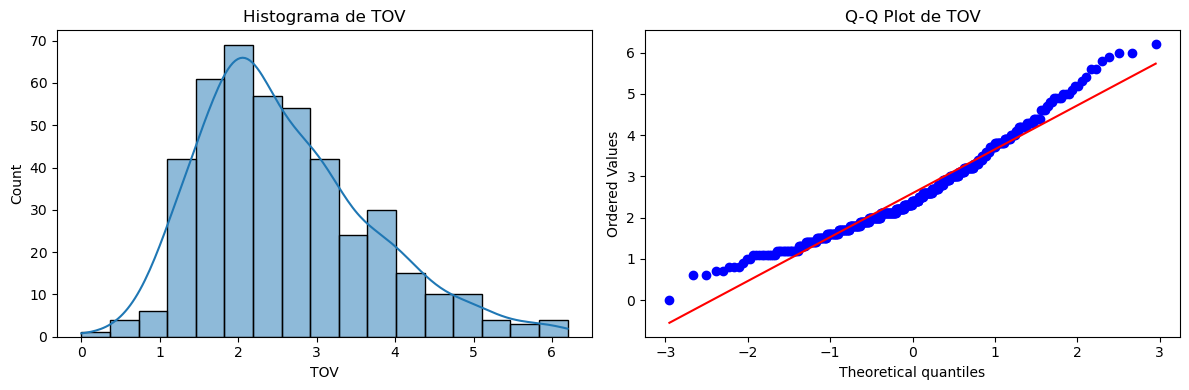

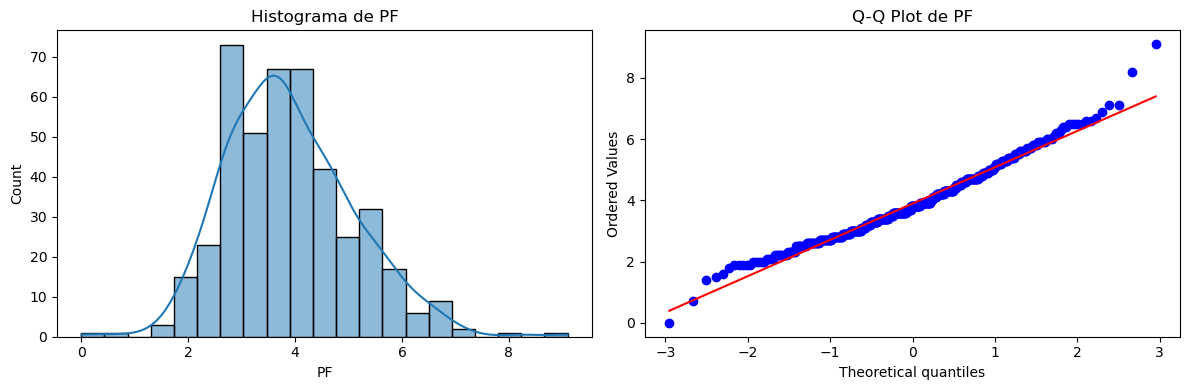

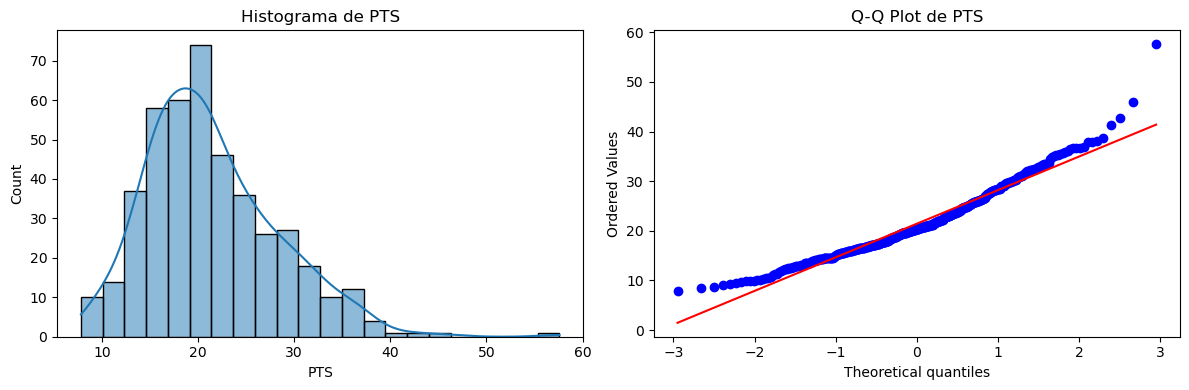

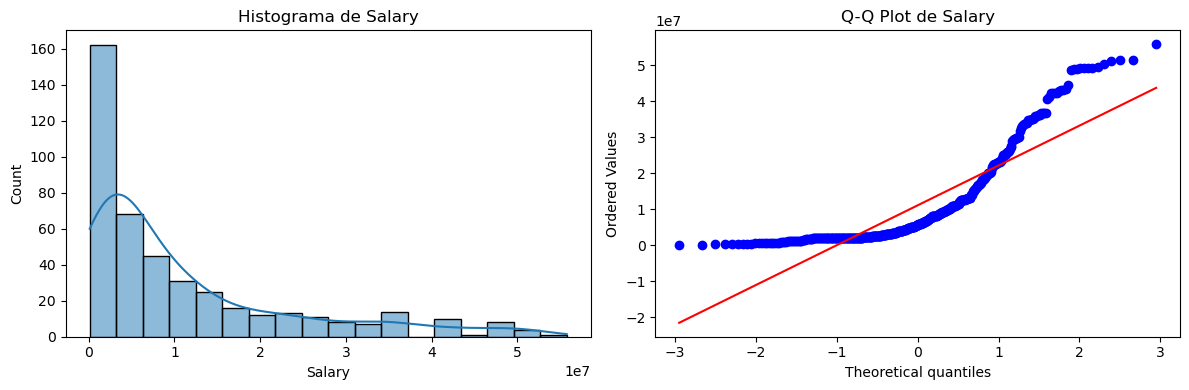

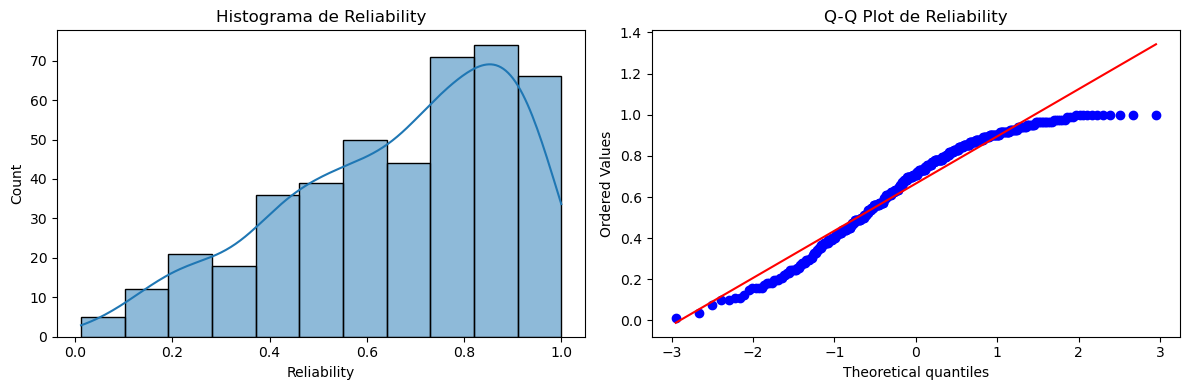

In [4]:
import scipy.stats as stats

for var in M_Final_DB_Num:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(M_Final_DB_Num[var].dropna(), kde=True)
    plt.title(f"Histograma de {var}")
    
    plt.subplot(1, 2, 2)
    stats.probplot(M_Final_DB_Num[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {var}")
    
    plt.tight_layout()
    plt.show()


Podemos ver que la mitad de los datos son normales y los que no lo son como pueden ver tienen problemas en las colas pues en vez de estar centrados se cargan a la derecha o a la izquierda. Esto sera un problema de normalidad con el que intentaremos vivir.

In [5]:
Descripción = M_Final_DB_Num.describe()
print(Descripción)

               WS        USG%         BPM        VORP         PER         Age  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean     2.700000   19.120183   -0.689450    0.669266   14.098624   26.110092   
std      2.558214    5.601199    2.978178    1.295978    4.421676    4.418018   
min     -1.200000    7.600000  -13.600000   -1.600000    0.000000   19.000000   
25%      0.775000   15.075000   -2.500000   -0.100000   10.975000   23.000000   
50%      2.000000   17.850000   -0.800000    0.300000   13.600000   25.000000   
75%      4.000000   22.550000    0.900000    1.125000   16.600000   29.000000   
max     16.700000   42.200000   13.300000    9.800000   32.000000   40.000000   

             2PA         2P%         3PA         3P%  ...         ORB  \
count  436.00000  436.000000  436.000000  436.000000  ...  436.000000   
mean     9.68922    0.534108    7.453899    0.328339  ...    2.302064   
std      4.34581    0.078630    3.554095    0.09667

Podemos ver que las medias y varianzas de los datos en la base. Puede que algunas metricas se vean raras esto se debe a que el set de datos esta ajustado a 48 minutos es decir se extrapola la producción total que tendria el jugador si jugara todo el partido. Esto se hizo con el fin de tener un set de datos más "normal" para jugadores que no forman parte de la rotación de su equipo consistentemente.

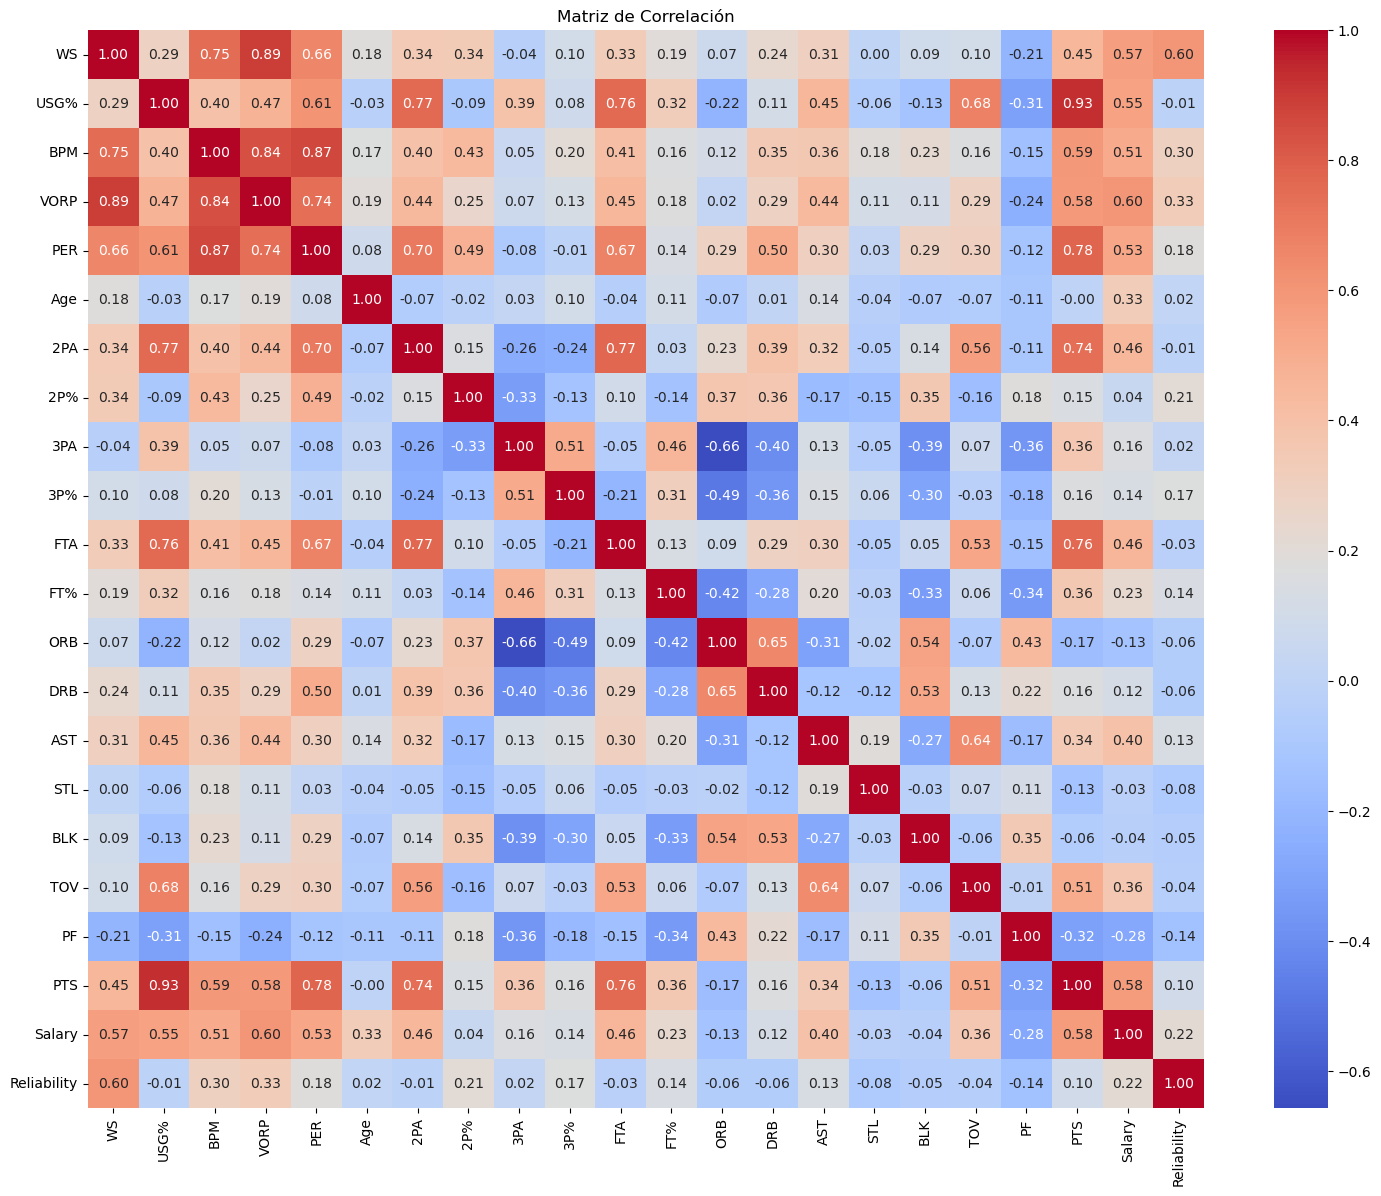

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))  # Ajusta el tamaño según lo que necesites
corr = M_Final_DB_Num.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Lo que podemos ver en estas correlaciones son resultados esperados. Como que los jugadores que más puntos generan son lo que tienen myor usage y a su vez mayoes intentos de tiro. 

Otras correlaciones interesantes son la parte superior izquierda que muestra que las win shares estan fuertemente correlacionadas con otras metricas avanzadas de desempeño.

Por último una correlacion negativa que me gustria destacar son los Rebotes Ofensivos y los intentos de triple, esto sugiere que aquellos jugadore que no suelen intentar triple suelen grabitas más cerca de la canasta a la ofensiva lo que por ende los lleva a pelear más rebotes.

### Parte 3 - Cluestering

En este apartado buscaremos agrupara a los jugadores por sus diferentes caracteristicas e interpretar estas agrupaciones

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

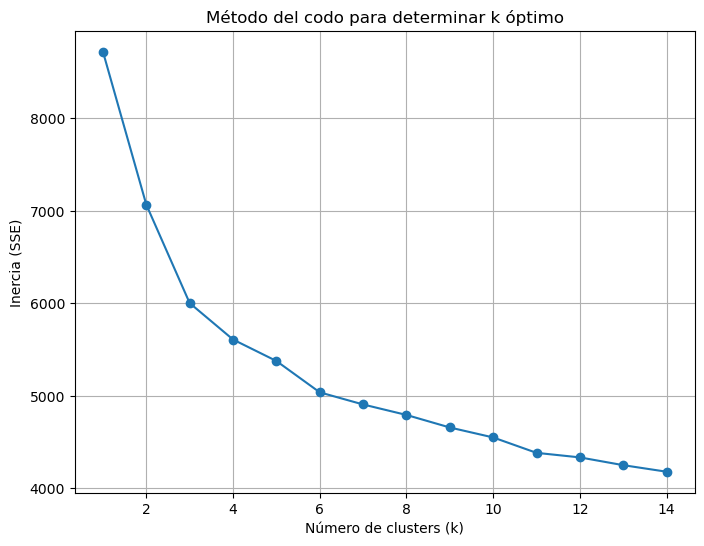

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

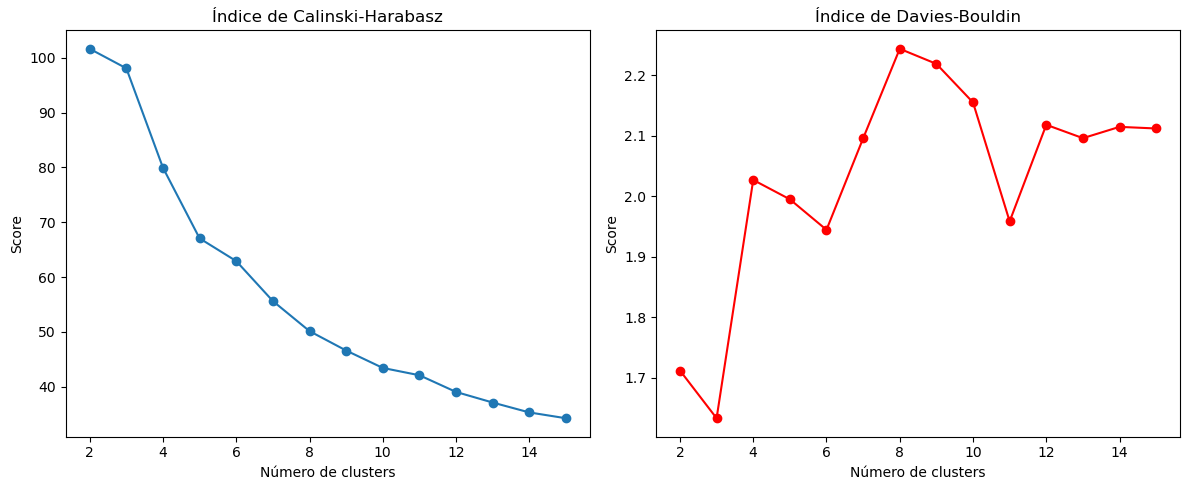

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(M_Final_DB_Num.drop(['WS','Salary'],axis=1))

inercia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # o X_pca si usaste PCA
    inercia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(K, inercia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del codo para determinar k óptimo")
plt.grid(True)
plt.show()


ch_scores = []
db_scores = []
k_range = range(2, 16)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


En este caso del método de codo econtramos dos puntos de inflexion el primero es cerca del nivel 3 y el siguiente es cercano al punto6.

Calinski-Harabas mide la dispersión de los clusters y podemos interpretarlo como que a mayor valor, mayor dispersion entre los clusters. Mientras que Davies-Bouldin mide la dispersión interna del cluster lo que nos hace buscar un valor bajo pues este representa una mejo compacidad.

En este caso observamos que los 3 ejemplos coinciden en el punto 3, dado que este punto seria muy restrictivo para acomodar a todos los jugadores agregaremos a la prueba un cluster 6

In [43]:
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
BD_Cluster = M_Final_DB.copy()
BD_Cluster["Cluster"] = labels_final

k_optimo = 6
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
BD_Cluster["Cluster B"] = labels_final
BD_Cluster.head()

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,2P%,...,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability,Cluster,Cluster B
0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,0.571,...,2.4,1.4,3.4,3.0,45.9,G,35859950.0,0.926829,1,5
1,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,29,70,19.3,0.627,...,2.4,0.8,4.3,3.0,38.7,C-F,51415938.0,0.853659,1,5
2,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,0.712,...,1.6,1.5,2.0,2.7,23.1,C-F,20000000.0,1.000000,0,0
3,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,30,67,26.3,0.620,...,1.2,1.6,4.3,3.3,42.7,F-G,48787676.0,0.817073,1,5
4,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,24,73,8.7,0.581,...,2.1,1.0,2.4,1.8,26.6,G,42176000.0,0.890244,1,5


In [ ]:
Cluster_3 = BD_Cluster.drop(['Player','G','Cluster B','WS','Salary','Pos'],axis=1).groupby('Cluster').mean().round(2)
Cluster_3['Modelo'] = 3
Cluster_6 = BD_Cluster.drop(['Player','G','Cluster','WS','Salary','Pos'],axis=1).groupby('Cluster B').mean().round(2)
Cluster_6['Modelo'] = 6
Cluster_Final = pd.concat([Cluster_3,Cluster_6])
Cluster_Final.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Cluster.csv')
Cluster_Final

,USG%,BPM,VORP,PER,Age,2PA,2P%,3PA,3P%,FTA,...,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Reliability,Modelo
0,16.60,-0.22,0.55,16.34,25.67,11.04,0.61,3.47,0.23,4.24,...,4.65,9.43,3.49,1.58,2.04,2.38,5.05,19.45,0.64,3
1,26.58,1.90,1.94,18.49,26.63,14.22,0.53,9.05,0.35,6.72,...,1.72,6.93,7.03,1.64,0.84,3.65,3.31,30.43,0.71,3
2,16.68,-1.99,0.15,11.40,26.03,7.23,0.51,8.10,0.35,2.79,...,1.76,5.35,4.39,1.71,0.71,2.19,3.76,18.13,0.66,3
0,16.57,0.06,0.73,17.61,25.72,12.38,0.61,1.79,0.15,4.63,...,5.54,10.46,3.39,1.39,2.23,2.47,4.93,19.62,0.68,6
1,24.27,-0.69,0.53,15.07,25.85,12.24,0.51,9.22,0.35,5.36,...,1.54,5.84,6.17,1.67,0.65,3.51,3.58,26.68,0.64,6
2,16.31,-0.79,0.52,12.40,27.85,6.22,0.53,9.23,0.38,2.44,...,1.46,5.10,4.33,1.47,0.65,1.78,3.38,19.20,0.78,6
3,15.66,-0.01,0.52,14.36,25.93,8.35,0.59,5.85,0.35,3.15,...,3.16,7.36,3.80,2.06,1.46,2.09,4.78,18.27,0.65,6
4,16.59,-4.28,-0.35,8.98,23.88,7.73,0.47,7.09,0.30,2.98,...,1.90,5.33,4.32,1.72,0.71,2.53,3.98,15.87,0.50,6
5,28.84,4.13,3.20,21.70,27.15,16.30,0.55,8.64,0.35,8.10,...,1.98,8.09,7.86,1.66,1.03,3.84,3.15,33.85,0.75,6


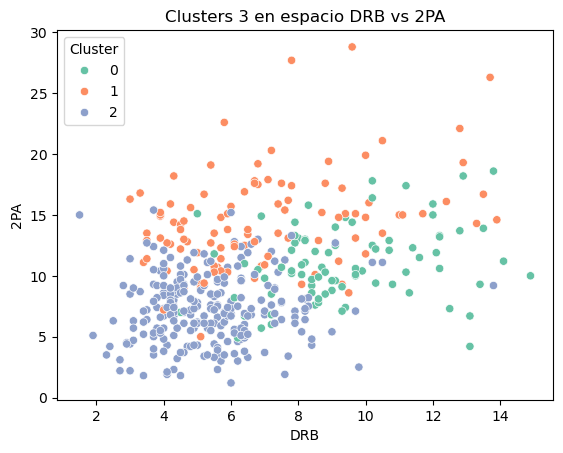

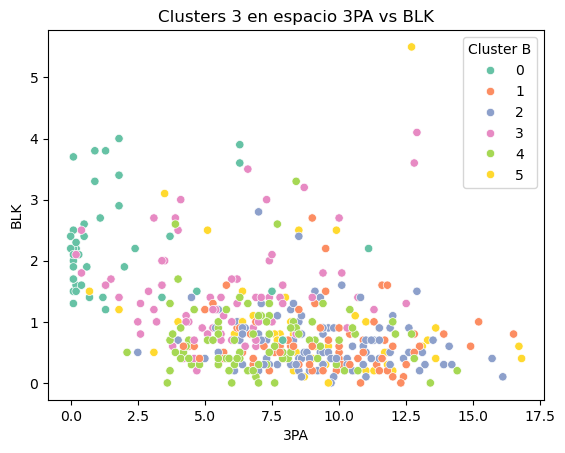

In [ ]:
import seaborn as sns

sns.scatterplot(data=BD_Cluster, x = 'DRB', y = '2PA', hue="Cluster", palette="Set2")
plt.title(f"Clusters 3 en espacio DRB vs 2PA")
plt.show()

sns.scatterplot(data=BD_Cluster, x = '3PA', y = 'BLK', hue="Cluster B", palette="Set2")
plt.title(f"Clusters 3 en espacio 3PA vs BLK")
plt.show()

Utilizando los Clusters y analizandolos llegamos a la conclusion de que definitivamente es mejor usar 3 agrupaciones que 6 ya que en 6 se pierde un poco variables que explican estilos de juego. Mientras que en 3 es muy sencillo clasificarlos en los siguientes grupos 1-Creadores de Juego, 0-Hombres Grandes y 2-3&D que son frames muy basicos pero muy clasicos de la NBA.

# Parte Final Procesamiento Final - Optimisación
En este apartado buscaremos obtener el mejor equipo con base en Win share restringiendo por lo que queramos. En este caso restringire por el Salary Cap de la NBA el cual es $126.529.000 para 2025. Respecto a las caracteristicas del Cluster solo permitiremos un maximo de 3 Creadores de Juego, 4 Hombres Grandes y 7 3&D players.

In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpBinary

modelo = LpProblem("Maximizar_WS", LpMaximize)

jugadores = BD_Cluster.index
x = LpVariable.dicts("Jugador", jugadores, cat=LpBinary)

modelo += lpSum(BD_Cluster.loc[i, 'WS'] * x[i] for i in jugadores)

modelo += lpSum(BD_Cluster.loc[i, 'Salary'] * x[i] for i in jugadores) >= 126529000
modelo += lpSum(BD_Cluster.loc[i, 'Salary'] * x[i] for i in jugadores) <= 140588000

modelo += lpSum(x[i] for i in jugadores if BD_Cluster.loc[i, 'Cluster'] == 0) <= 5
modelo += lpSum(x[i] for i in jugadores if BD_Cluster.loc[i, 'Cluster'] == 1) <= 3
modelo += lpSum(x[i] for i in jugadores if BD_Cluster.loc[i, 'Cluster'] == 2) <= 7

modelo.solve()

seleccionados = [i for i in jugadores if x[i].value() == 1]
BD_Cluster.loc[seleccionados]



,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,2P%,...,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability,Cluster,Cluster B
0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,0.571,...,2.4,1.4,3.4,3.0,45.9,G,35859950.0,0.926829,1,5
2,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,0.712,...,1.6,1.5,2.0,2.7,23.1,C-F,20000000.0,1.000000,0,0
9,Evan Mobley,9.0,23.2,4.6,3.6,22.3,23,71,15.0,0.621,...,1.4,2.5,3.2,3.1,29.1,F-C,11227809.0,0.865854,1,5
10,Payton Pritchard,8.6,19.0,3.5,3.2,17.6,27,80,5.1,0.642,...,1.5,0.3,1.8,2.5,24.2,G,6696429.0,0.975610,2,2
14,Alperen Sengun,8.3,26.2,4.4,3.9,21.4,22,76,21.1,0.519,...,1.7,1.2,3.9,4.2,29.1,C-F,5424654.0,0.926829,1,5
17,Christian Braun,8.0,15.8,0.3,1.6,16.0,23,79,10.7,0.648,...,1.5,0.7,1.5,3.1,21.9,G,3089640.0,0.963415,2,2
18,Amen Thompson,8.0,17.5,4.1,3.4,18.7,22,69,13.1,0.599,...,2.1,1.9,3.0,3.6,20.9,G,9249960.0,0.841463,0,0
29,Onyeka Okongwu,7.2,17.3,1.3,1.7,19.0,24,74,12.5,0.634,...,1.6,1.6,2.1,4.5,23.0,F,14000000.0,0.902439,0,0
31,Luke Kornet,7.0,11.4,3.3,1.8,19.6,29,73,9.8,0.675,...,1.3,2.5,1.1,4.2,15.6,C-F,2087519.0,0.890244,0,0
47,Chris Paul,5.7,14.0,0.8,1.6,14.7,39,82,4.4,0.514,...,2.2,0.5,2.7,3.2,15.1,G,10460000.0,1.000000,2,2


In [47]:
pip install pulp


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 220.2 kB/s eta 0:01:15
   ---------------------------------------- 0.1/16.4 MB 328.2 kB/s eta 0:00:50
   ---------------------------------------- 0.1/16.4 MB 438.1 kB/s eta 0:00:38
   ---------------------------------------- 0.2/16.4 MB 573.4 kB/s eta 0:00:29
    --------------------------------------- 0.2/16.4 MB 724.0 kB/s eta 0:00:23
    --------------------------------------- 0.3/16.4 MB 780.5 kB/s eta 0:00:21
    --------------------------------------- 0.3/16.4 MB 737.3 kB/s eta 0:00:22
    --------------------------------------- 0.4/16.4 MB 867.0 kB/s eta 0:00:19
   - -------------------------------------- 0.4/16.4 MB 904.2 kB/s eta 0:00:18
   - ---